[[23  1]
 [ 0 24]] 0.9791666666666666


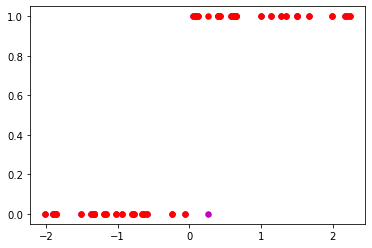

In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler as SS
import matplotlib.pyplot as plt
df=np.array(pd.read_csv("svm.csv"))
x=df[:,:-1]
y=df[:,-1]

x_train,x_test,y_train,y_test=tts(x,y,random_state=0,test_size=0.3)

ss=SS()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)
y_pre=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pre),accuracy_score(y_test,y_pre))
plt.scatter(x_test,y_test,color="m",s=30)
plt.scatter(x_test,y_pre,color="r",s=30)
plt.show()




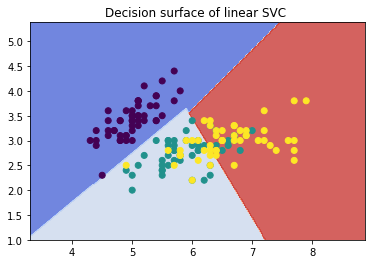

In [50]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y)
ax.set_title('Decision surface of linear SVC ')
plt.show()